# Visualize model predictions

Ensure that samples entered are in the test set or validation set

In [1]:
import os
import sys
from pytorch_lightning import Trainer
import albumentations as A
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
import pytorch_lightning as pl
import numpy as np

sys.path.append('.')
#from models.UNet_mateuszbuda import UNet_m
from models.UNet_L import UNet_no_val
from models.loss import DiceLoss, DiceLoss2

from run_pretraining import get_dataset

from data.CTDataSet import CTDicomSlices, DatasetManager
from data.CustomTransforms import Window, Imagify, Normalize

from tests.test_CTDataSet import plot_slices_and_mask

/home/hussam/imager/env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Plotting function

In [2]:
def plot_img_and_mask(img, prediction, mask, text = ""):
    #mask = mask * 255 // 4
    #prediction = prediction * 255 // 4
    
    img = img.numpy()
    mask = mask.numpy()
    prediction = prediction.numpy()

    
    fig = plt.figure(figsize=(21,21))
    cols, rows = 3, 1
    
    fig.patch.set_facecolor('white')
    
    fig.add_subplot(rows, cols, 1)
    plt.title('CT Slice')
    plt.imshow(img, cmap='gray')
    
    fig.add_subplot(rows, cols, 2)
    plt.title('Prediction')
    plt.imshow(img, cmap='gray')
    plt.imshow(prediction, cmap='jet', alpha=0.3)
    
    fig.add_subplot(rows, cols, 3)
    plt.title('Ground truth')
    plt.imshow(img, cmap='gray')
    plt.imshow(mask, cmap='jet', alpha=0.3)
    
    plt.show()

### Some constants

In [3]:
WL = 50
WW = 200

img_size = 256

def to_float(x, **kwargs):
    return x.astype('float32')

### Create the relevant transforms

In [45]:
test_set = True
WL = 50
WW = 200
mean = 61.0249
std = 78.3195

In [46]:
img_mask_tsfm = A.Compose([A.Resize(img_size, img_size)], 
            additional_targets={"image1": 'image', "mask1": 'mask'})

prep = transforms.Compose([Window(WL, WW), Imagify(WL, WW), Normalize(mean, std)])

### Build the relevant datasets

In [47]:
model_dir = "/mnt/d/model_runs2024/model_runs/2024-11-17-19_13_59"
checkpoint_f = '/mnt/d/model_runs2024/model_runs/2024-11-17-19_13_59/logs/lightning_logs/version_0/checkpoints/best-epoch=25.ckpt'

#dataset = "../organized_dataset_2"
dataset = '/home/hussam/imager/organized_dataset_2'

if test_set:
    dsm = DatasetManager.load_train_val_test(dataset, "{}/train.txt".format(model_dir), "{}/val.txt".format(model_dir), "{}/test.txt".format(model_dir))

    train_dicoms, val_dicoms, test_dicoms = dsm.get_dicoms() # DICOM glob is preset in the class file

    test_ds = CTDicomSlices(test_dicoms, img_and_mask_transform = img_mask_tsfm, preprocessing=prep)

    test_dl = DataLoader(test_ds, batch_size=1, num_workers = 0, shuffle=True)
else:
    resize_tsfm = A.Compose([A.Resize(img_size, img_size)],
            additional_targets={"image1": 'image', "mask1": 'mask'})

    dcm_list = CTDicomSlices.generate_file_list(dataset, dicom_glob='/*/dicoms/*.dcm')
    ds = CTDicomSlices(dcm_list, preprocessing = prep,
                        resize_transform = resize_tsfm, n_surrounding=1, mask_is_255=False)
                        
    test_dl = DataLoader(ds, batch_size = 1, num_workers = 0, shuffle = True)

In [48]:
model = UNet_no_val.load_from_checkpoint(checkpoint_f, datasets=None, in_channels=3, classes=2)

loss = DiceLoss()
loss2 = DiceLoss2()

Mask sum is 0 and max is 0
Model WL: 50 - WW: 200
Input file is: ('/home/hussam/imager/organized_dataset_2/HNSCC-01-0565/dicoms/6.dcm',)
Dice score 2 is: 9.982%


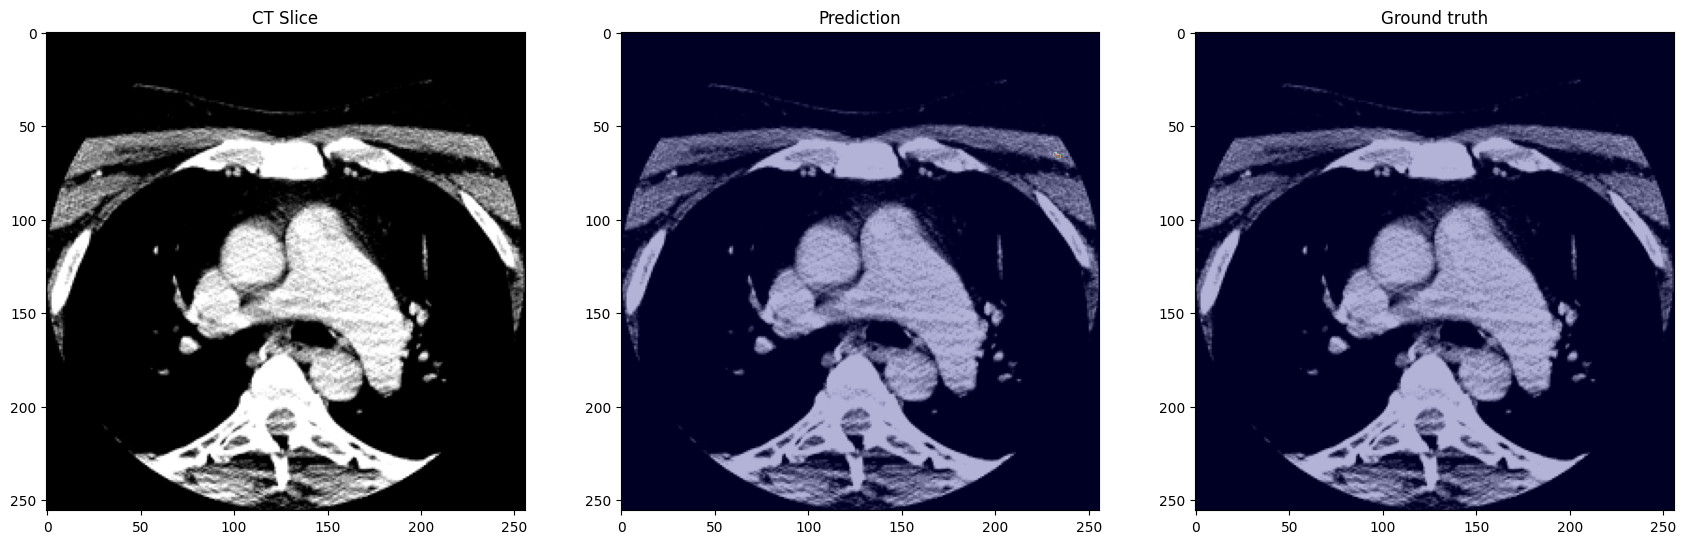

Mask sum is 94 and max is 1
Model WL: 50 - WW: 200
Input file is: ('/home/hussam/imager/organized_dataset_2/HNSCC-01-0289/dicoms/148.dcm',)
Dice score 2 is: 1.053%


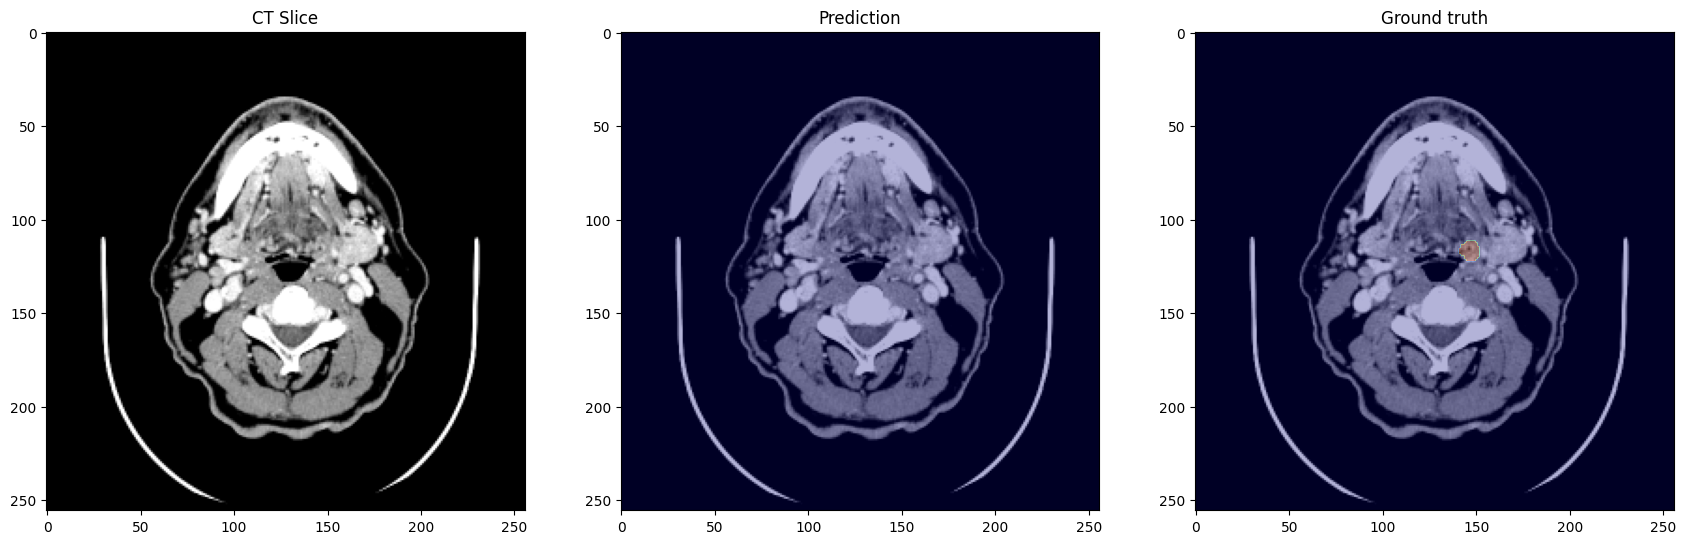

Mask sum is 619 and max is 1
Model WL: 50 - WW: 200
Input file is: ('/home/hussam/imager/organized_dataset_2/HNSCC-01-0449/dicoms/192.dcm',)
Dice score 2 is: 40.080%


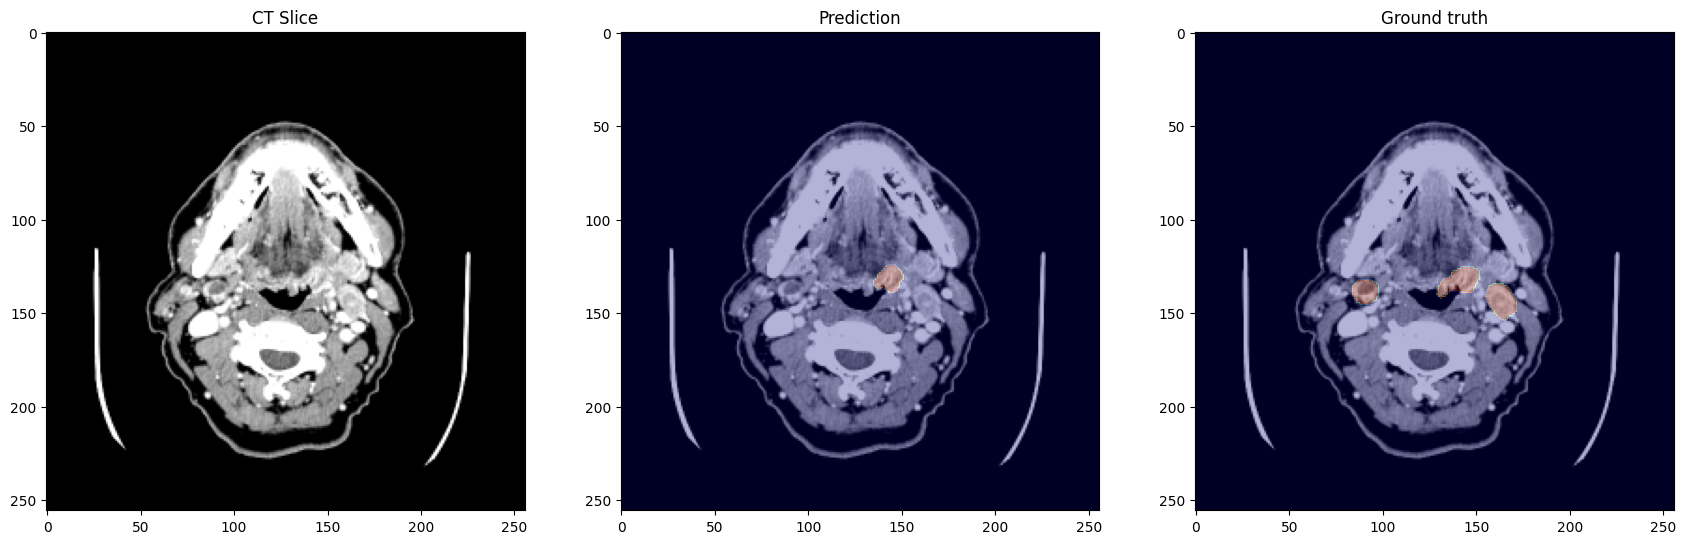

Mask sum is 398 and max is 1
Model WL: 50 - WW: 200
Input file is: ('/home/hussam/imager/organized_dataset_2/HNSCC-01-0376/dicoms/175.dcm',)
Dice score 2 is: 58.548%


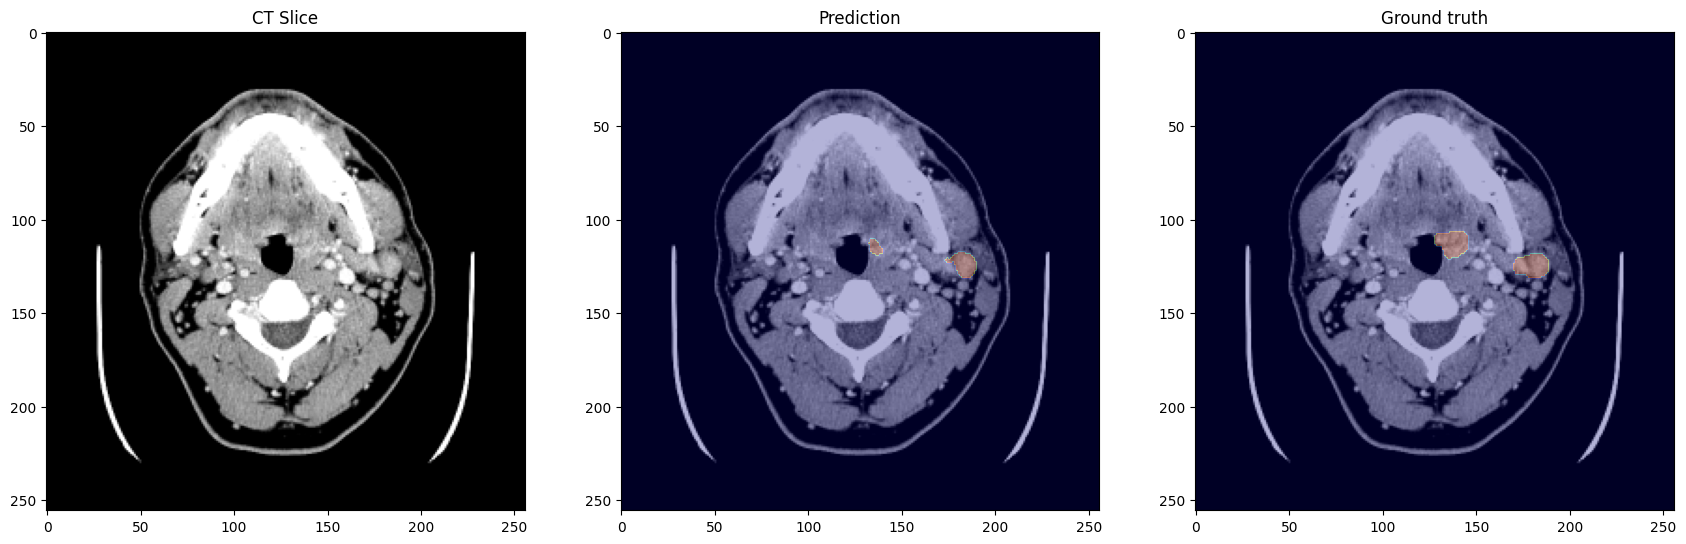

Mask sum is 504 and max is 1
Model WL: 50 - WW: 200
Input file is: ('/home/hussam/imager/organized_dataset_2/HNSCC-01-0293/dicoms/148.dcm',)
Dice score 2 is: 92.620%


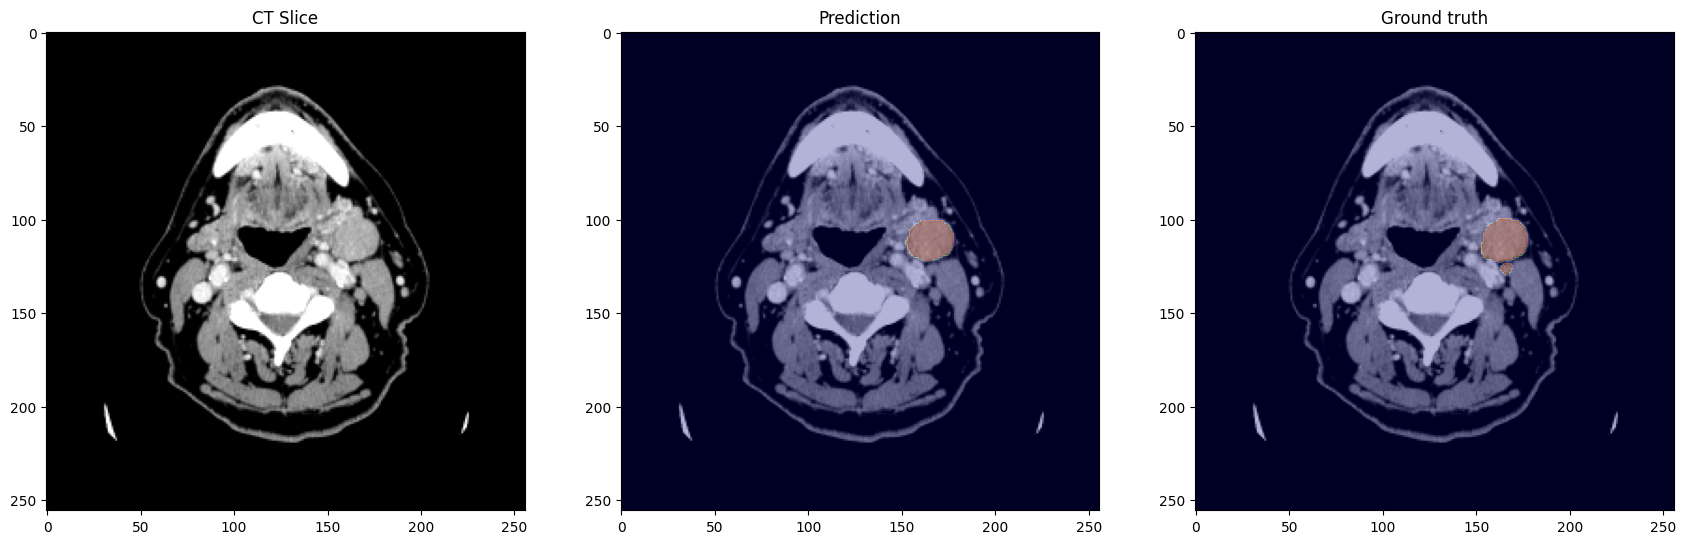

Mask sum is 665 and max is 1
Model WL: 50 - WW: 200
Input file is: ('/home/hussam/imager/organized_dataset_2/HNSCC-01-0372/dicoms/160.dcm',)
Dice score 2 is: 82.090%


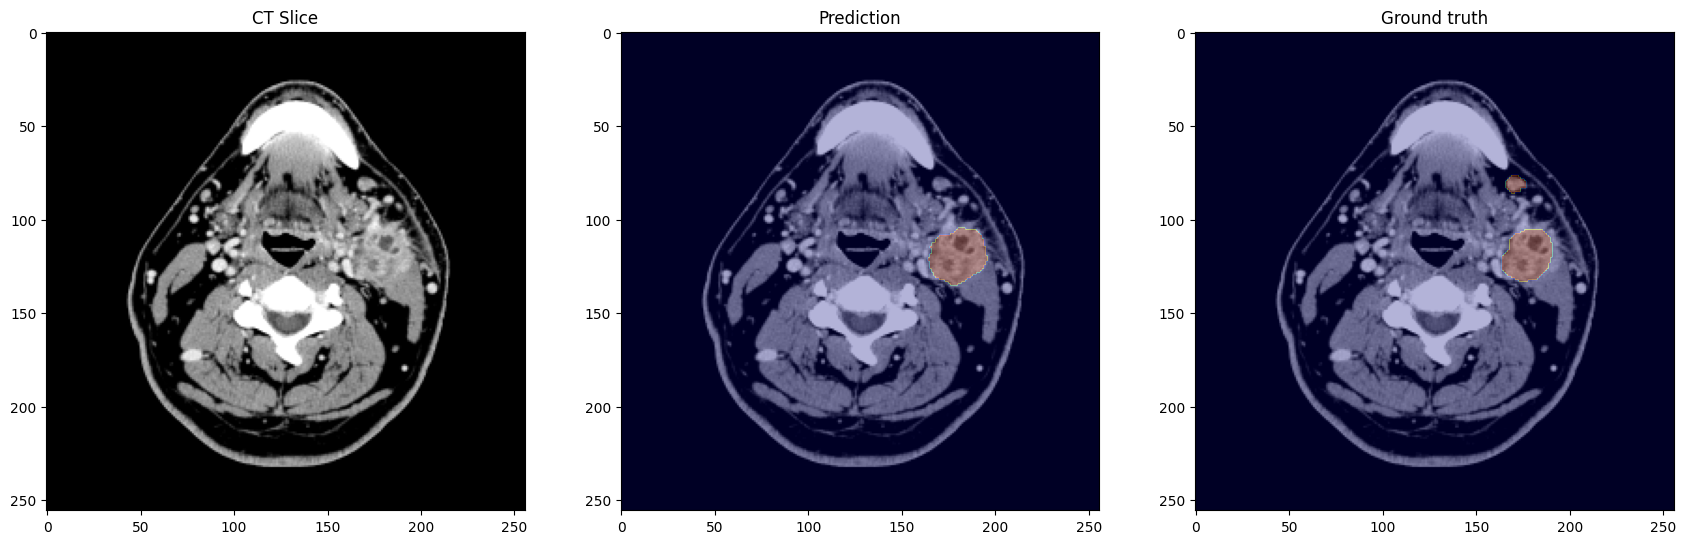

Mask sum is 0 and max is 0
Model WL: 50 - WW: 200
Input file is: ('/home/hussam/imager/organized_dataset_2/HNSCC-01-0389/dicoms/9.dcm',)
Dice score 2 is: 0.662%


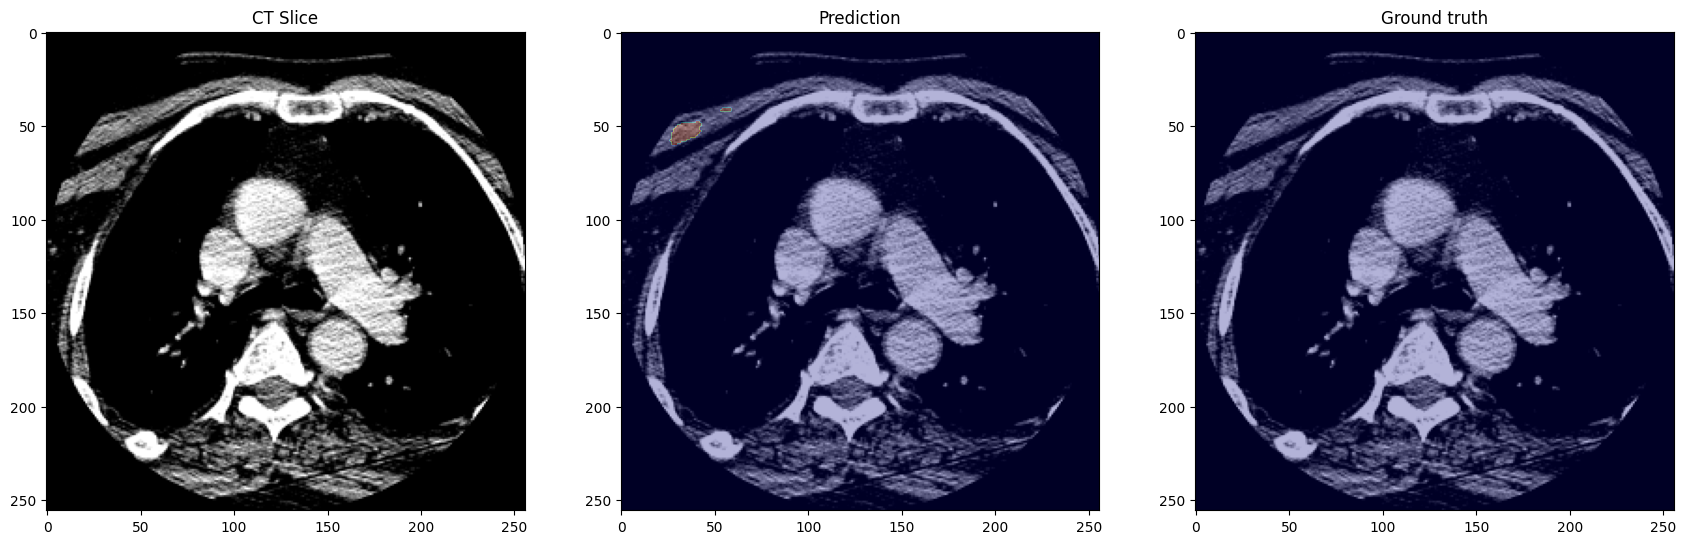

Mask sum is 336 and max is 1
Model WL: 50 - WW: 200
Input file is: ('/home/hussam/imager/organized_dataset_2/HNSCC-01-0627/dicoms/153.dcm',)
Dice score 2 is: 91.302%


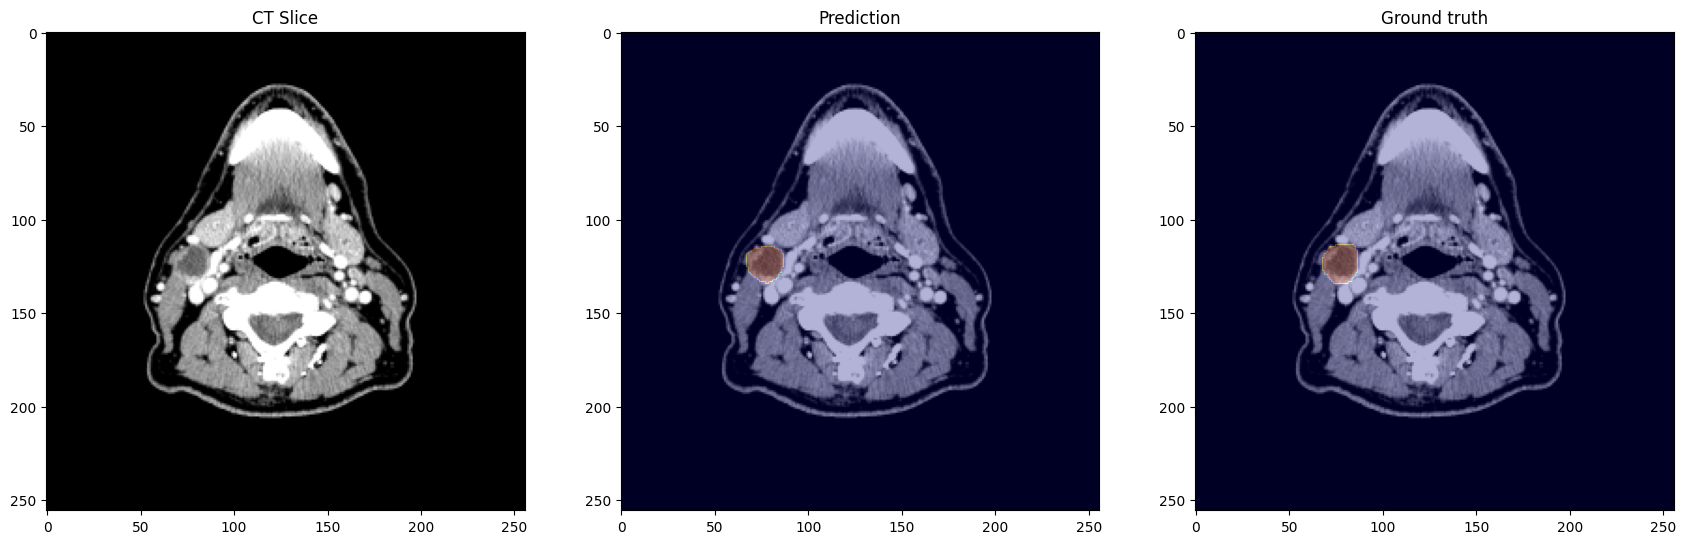

Mask sum is 116 and max is 1
Model WL: 50 - WW: 200
Input file is: ('/home/hussam/imager/organized_dataset_2/HNSCC-01-0256/dicoms/104.dcm',)
Dice score 2 is: 73.827%


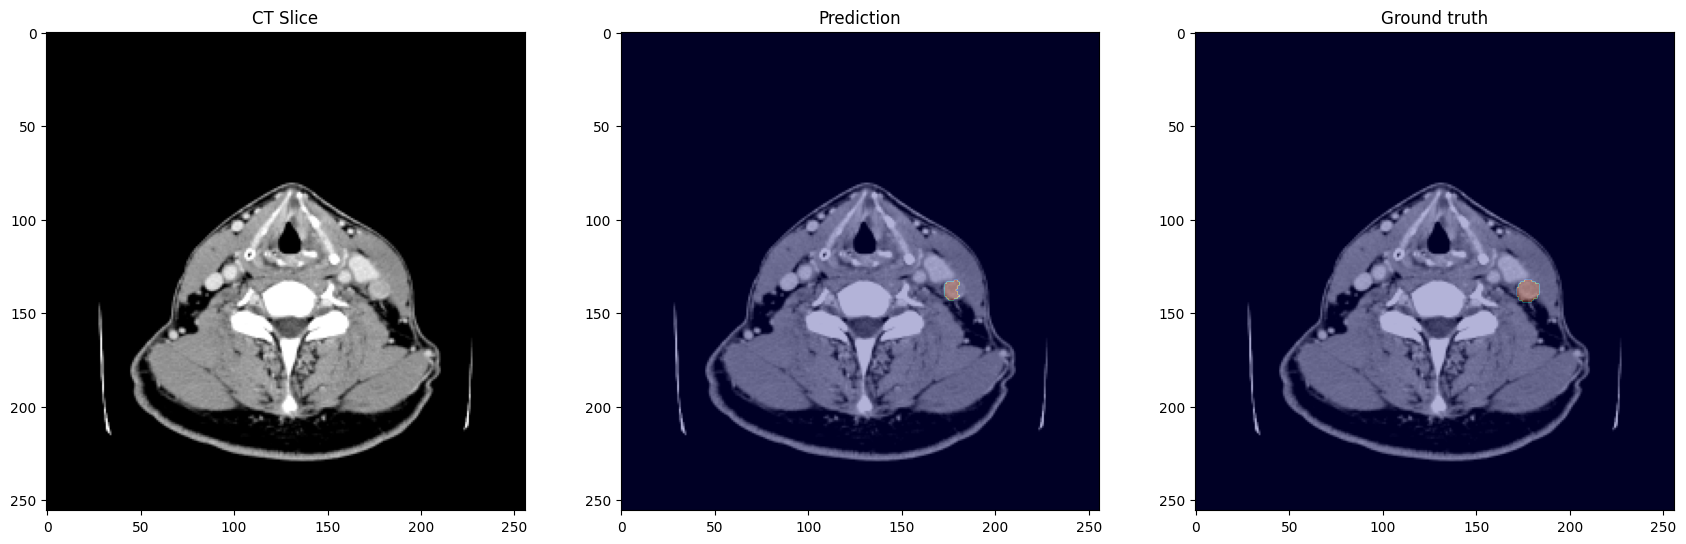

Mask sum is 3085 and max is 1
Model WL: 50 - WW: 200
Input file is: ('/home/hussam/imager/organized_dataset_2/HNSCC-01-0413/dicoms/112.dcm',)
Dice score 2 is: 49.731%


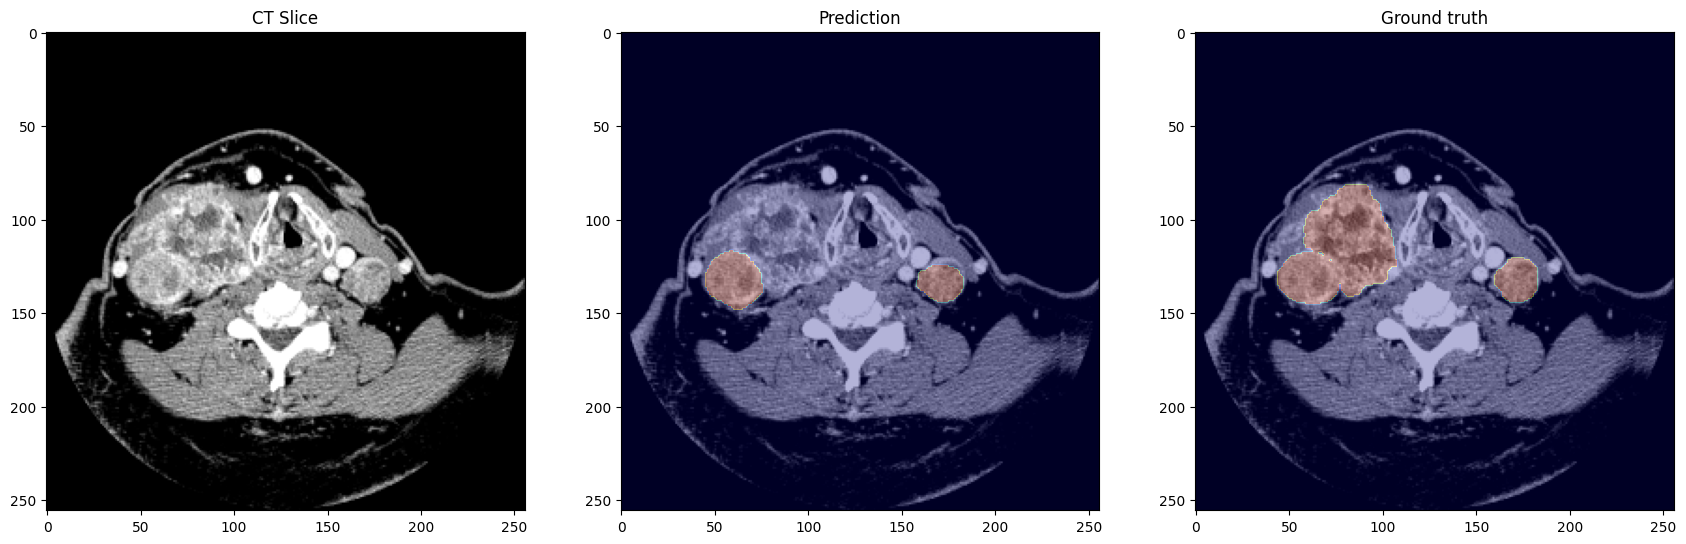

Mask sum is 1039 and max is 1
Model WL: 50 - WW: 200
Input file is: ('/home/hussam/imager/organized_dataset_2/HNSCC-01-0375/dicoms/155.dcm',)
Dice score 2 is: 87.517%


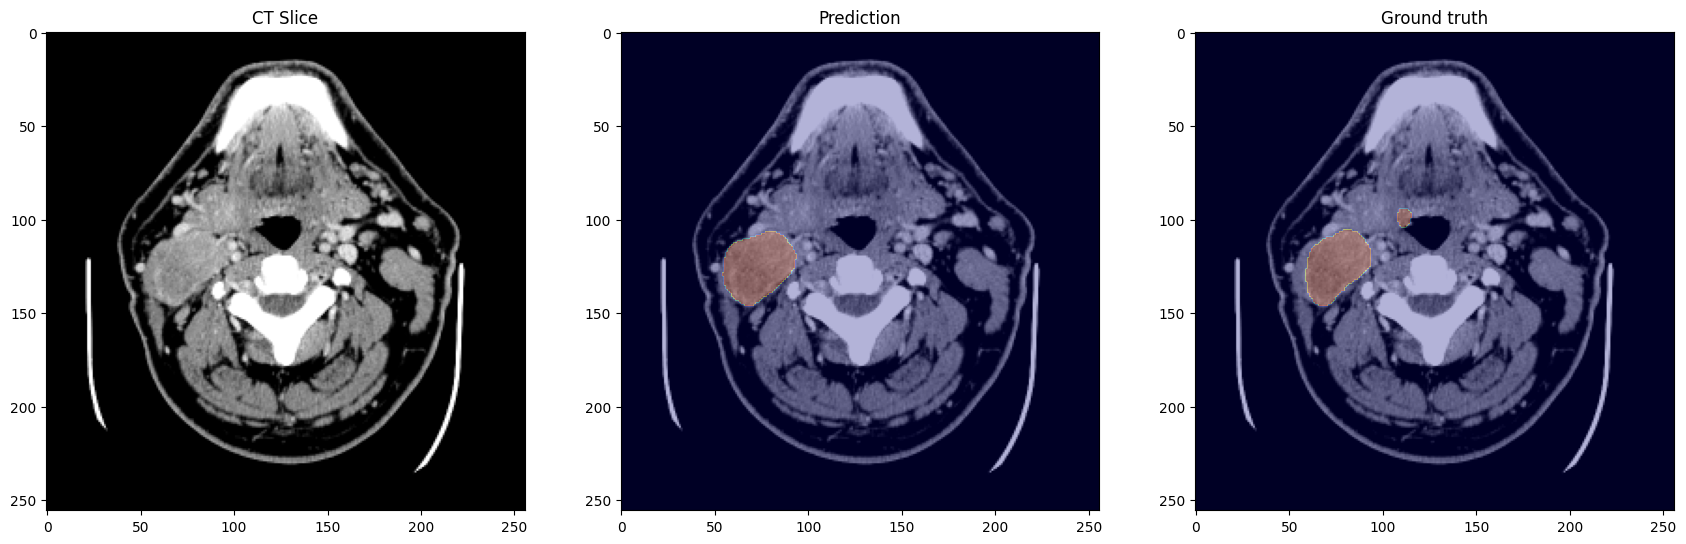

In [50]:
max = 10
for i, (slices, mask, img_path, slice_n) in enumerate(test_dl):   
    y_pred = model(slices)
    y_pred_img_only = y_pred[0,0,:,:]
    
    item = (torch.sum(mask) + torch.sum(torch.round(y_pred_img_only))).item()

    if ((torch.sum(mask) + torch.sum(torch.round(y_pred_img_only))).item() == 0):
        max += 1
        continue

    print("Mask sum is {} and max is {}".format(torch.sum(mask), torch.max(mask)))
    dice_score = 1 - model.loss(y_pred, mask)

    print("Model WL: {} - WW: {}".format(WL, WW))
    print("Input file is: {}".format(img_path))
    print("Dice score 2 is: {:.3f}%".format(dice_score * 100))

    plot_img_and_mask(slices[0,:,:,1], torch.round(y_pred_img_only.detach()), mask[0], slice_n)
    
    if i >= max:
        break

In [9]:
slices, mask, img_path, slice_n = next(iter(test_dl))

mask = mask.type(torch.float32)
y_pred = model(slices)

print(mask.shape)
print(torch.round(y_pred[:,0,:,:]).shape)

print(pl.metrics.functional.dice_score(torch.round(y_pred[:,0,:,:]), mask))
print(loss(torch.round(y_pred[:,0,:,:]), mask))

torch.Size([1, 256, 256])
torch.Size([1, 256, 256])


AttributeError: module 'pytorch_lightning' has no attribute 'metrics'